**Credit Fraud Detector Project**

Name: Yifan Dai

**Preparation**

Import packages and read the csv file

Use head() to see the first five rows of the dataframe 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time
import collections
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('creditcard.csv')
df.head()

2023-09-16 21:44:11.633482: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Insights**

mean transaction amount: 88 (very small)

total transaction numbers: 284807 (large enough for the model)

Class: 0 or 1 (categorical variable)

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Null values?**

there are zero null values, GOOD!

In [4]:
df.isnull().sum().max()

0

**Skewness-check**
The dataset is skewed towrad class 0, here is a imbalance data issue!

In [5]:
print('Class 0 is ', round(df['Class'].value_counts()[0]/ len(df)*100, 2), '% of the dataset')
print('Class 1 is ', round(df['Class'].value_counts()[1]/ len(df)*100, 2), '% of the dataset')

Class 0 is  99.83 % of the dataset
Class 1 is  0.17 % of the dataset


**EDA**

Plot to see this heavy skewed distribution for the class. 

Need to solve it before doing the regression model! 

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

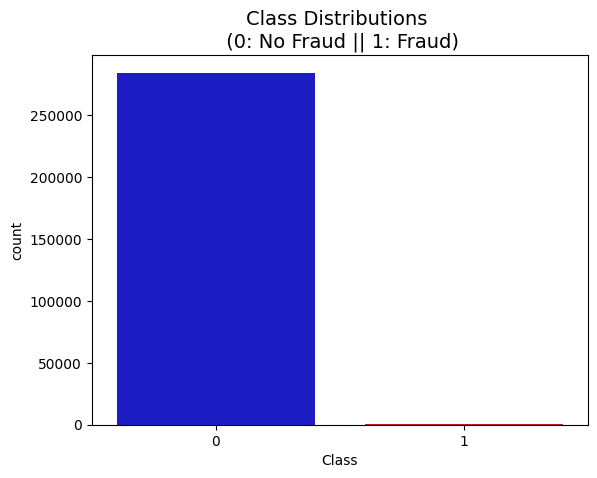

In [6]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data=df, x = 'Class', palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Check if transaction amount and time are also skewed.

(0.0, 172792.0)

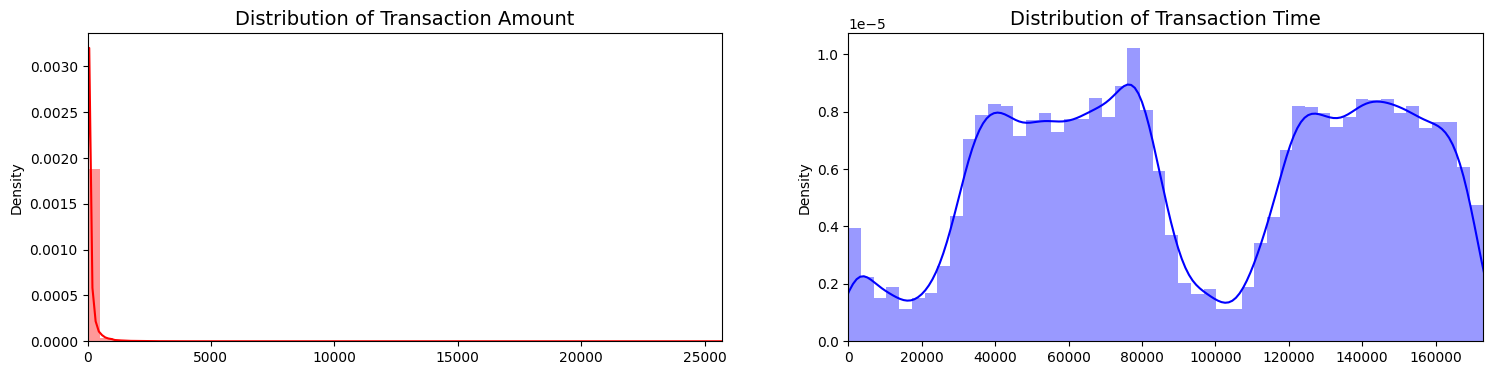

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

**Scaling dataset**

I need to create a subsample of this dataset since the original one is heavily skwed.

Issues: 

Overfitting (too many no fraud cases but we want to detect fraud)

Wrong correlation(imbalance data can not tell the correct correlation between the class and features)

In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

Move scaled amount and time to the first two columns

In [9]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_time','scaled_amount'], axis = 1, inplace = True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)

df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


**Split data**

We need to separate the original data before getting into Random UnderSampling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

s = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in s.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    old_Xtrain, old_Xtest = X[train_index], X[test_index]
    old_ytrain, old_ytest = y[train_index], y[test_index]

#old_Xtrain, old_Xtest, old_ytrain, old_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [11]:
train_unique_label, train_counts_label = np.unique(old_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(old_ytest, return_counts=True)
print('Label 1 Distribution')
print(train_counts_label/len(old_ytrain))
print(test_counts_label/len(old_ytest))

Label 1 Distribution
[0.99827076 0.00172924]
[0.99827952 0.00172048]


**Random Under-Sampling**

1. Identify how many imbalance data in our class.

2. Determine how many instances are 'Fraud', bring No Fraud number to the same so we have more balanced 
data while doing random undersampling.

3. Let's subsample data into 50/50.

In [12]:
df = df.sample(frac=1)
fraud_df = df.loc[df['Class'] == 1]
nofraud_df = df.loc[df['Class'] == 0][:492]

normal_dis_df = pd.concat([fraud_df, nofraud_df])

new_df = normal_dis_df.sample(frac = 1, random_state = 58)

new_df.head()


,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
254395,0.846086,-0.201355,0.202402,1.176270,0.346379,2.882138,1.407133,-0.504355,1.438537,-0.395603,...,-0.206239,0.242560,0.841230,-0.370157,-0.026012,0.491954,0.234576,-0.279788,-0.331933,1
87821,-0.268236,4.010340,0.530985,-1.368655,0.893127,0.370692,-1.301300,0.413628,-0.393875,0.218721,...,0.541170,0.046975,-0.263351,-0.148537,0.340996,-0.085972,0.907955,-0.074088,0.056354,0
151009,0.113606,-0.293440,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,...,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1
82751,-0.295539,0.321386,1.235433,-0.693124,0.674269,-0.732638,-1.068964,-0.239501,-0.804580,0.050332,...,0.164783,0.474960,1.282383,-0.137958,0.293022,0.450918,-0.031956,0.028012,0.013314,0
9179,-0.840776,-0.293440,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,...,1.191444,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1


Now we check if the class is equally distributed

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

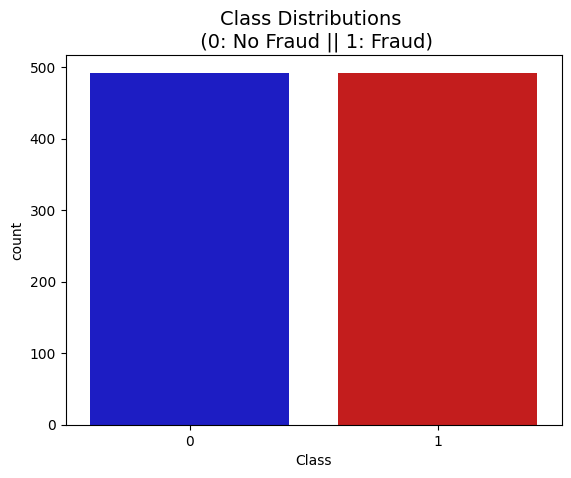

In [13]:
sns.countplot(data=new_df, x = 'Class', palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

**Correlation Metrices**

Create heatmap see the correlation for original and new dataframe.

Use new dataframe as reference

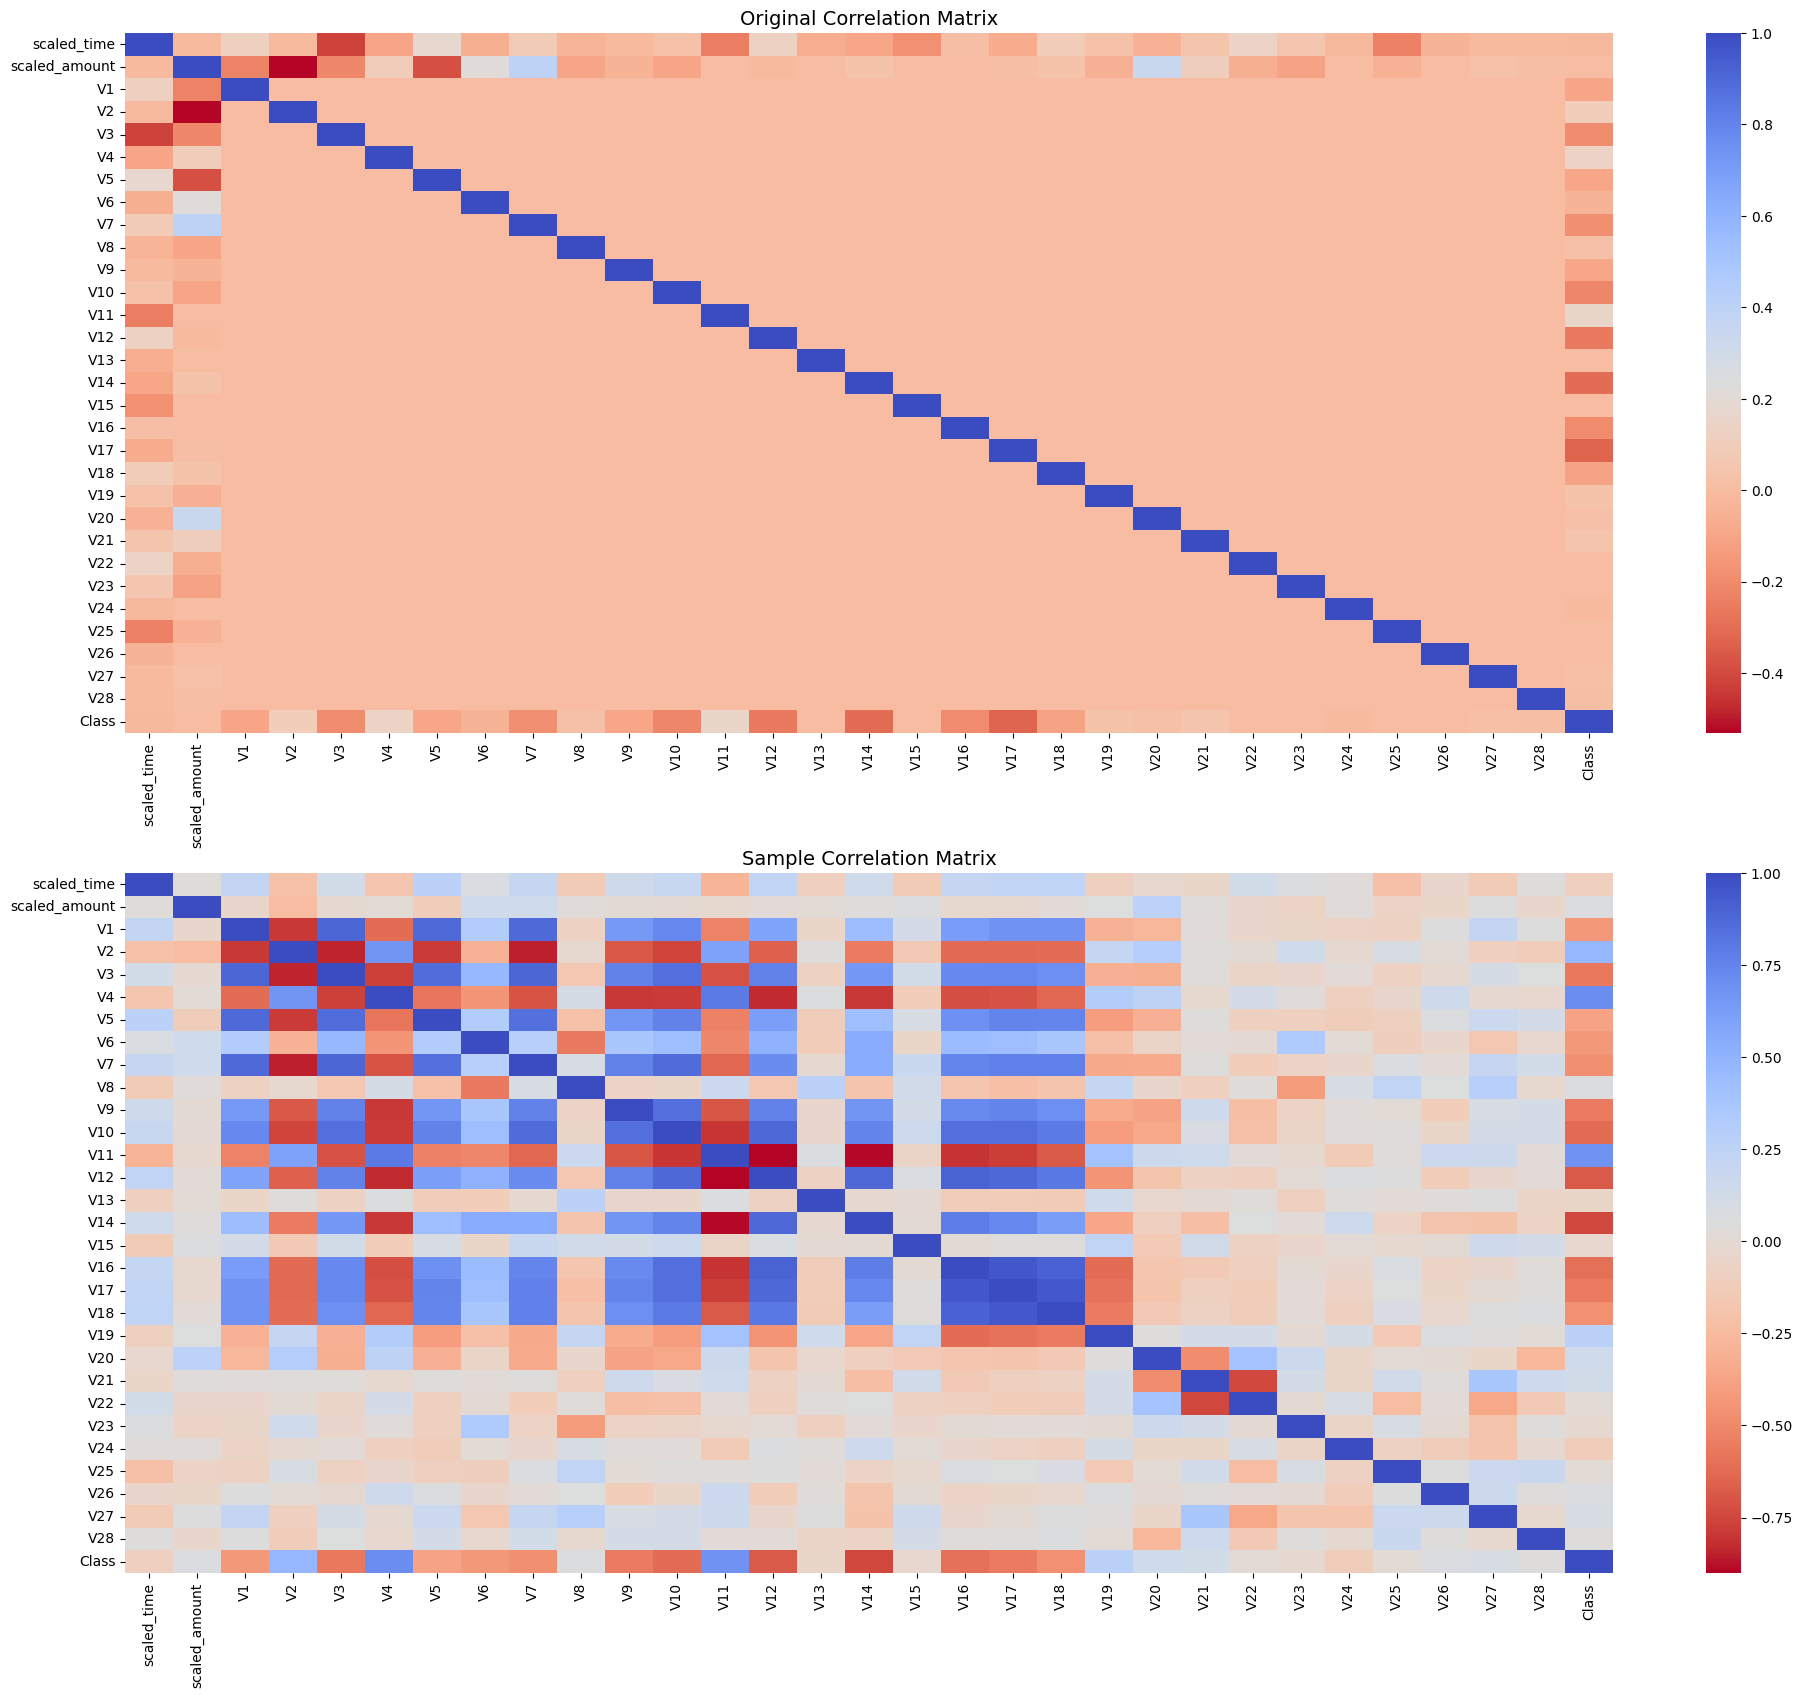

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
df_corr = df.corr()
sns.heatmap(df_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title('Original Correlation Matrix', fontsize = 14)

sample_corr = new_df.corr()
sns.heatmap(sample_corr, cmap='coolwarm_r',annot_kws={'size': 20}, ax=ax2)
ax2.set_title('Sample Correlation Matrix', fontsize = 14)
plt.show()


Above we can see V2, V4, V19, V11 are postively correlated with the class, while V14, V17, V18, V12, V8, V3 are negatively correlated with the class. 

Dive deeper with boxplot to figure out the corrleation between each feature and the class

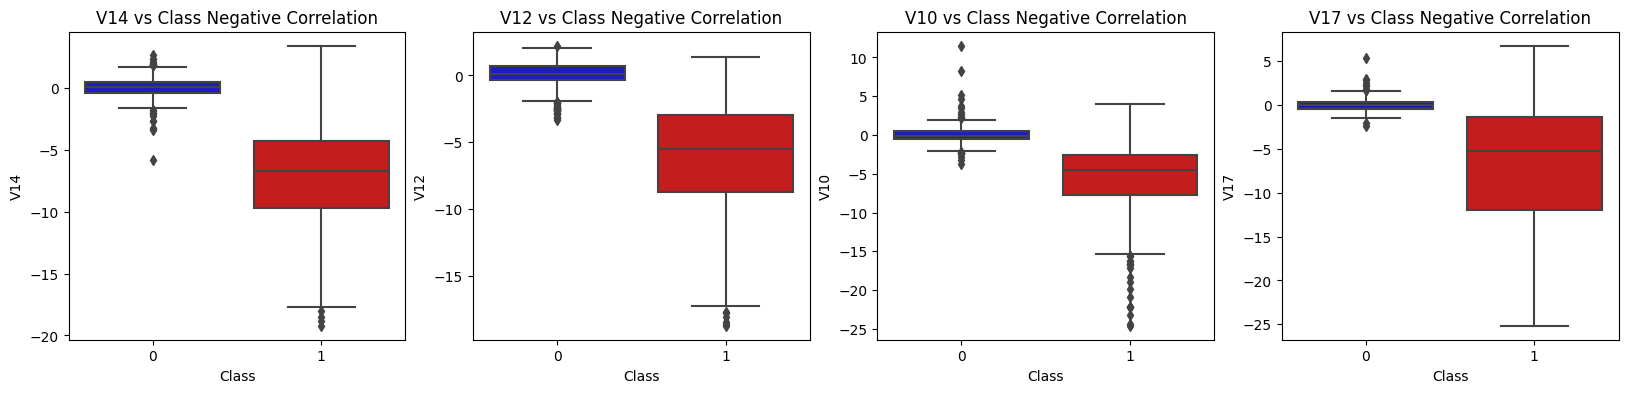

In [15]:
f, axes = plt.subplots(1, 4, figsize=(20,4))

sns.boxplot(x='Class', y = 'V14', data = new_df, palette=colors, ax = axes[0])
axes[0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class', y = 'V12', data = new_df, palette=colors, ax = axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class', y = 'V10', data = new_df, palette=colors, ax = axes[2])
axes[2].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x='Class', y = 'V17', data = new_df, palette=colors, ax = axes[3])
axes[3].set_title('V17 vs Class Negative Correlation')

plt.show()

Above shows that lower value would likely to be a fraud activity.

Let's create a subsets of boxplots for those positive correlation feature (V2, V9, V11, V19)

For positive correlation features, higher values high likehood to be in fraud. 

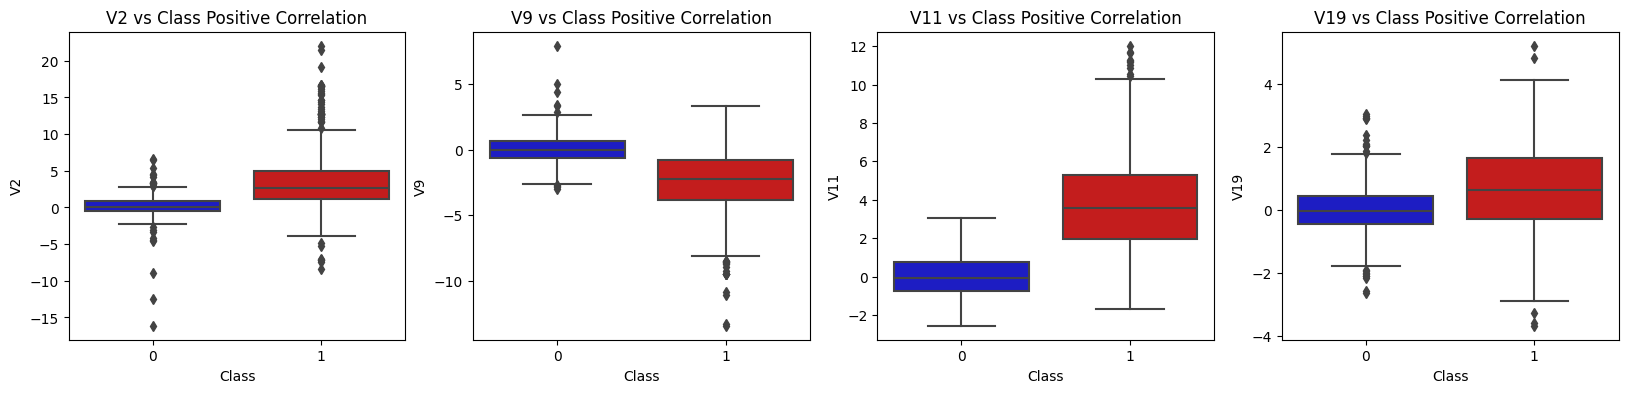

In [16]:
f, axes = plt.subplots(1, 4, figsize=(20,4))

sns.boxplot(x='Class', y = 'V2', data = new_df, palette=colors, ax = axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x='Class', y = 'V9', data = new_df, palette=colors, ax = axes[1])
axes[1].set_title('V9 vs Class Positive Correlation')

sns.boxplot(x='Class', y = 'V11', data = new_df, palette=colors, ax = axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x='Class', y = 'V19', data = new_df, palette=colors, ax = axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

V14 is the only one has the normal distribution.

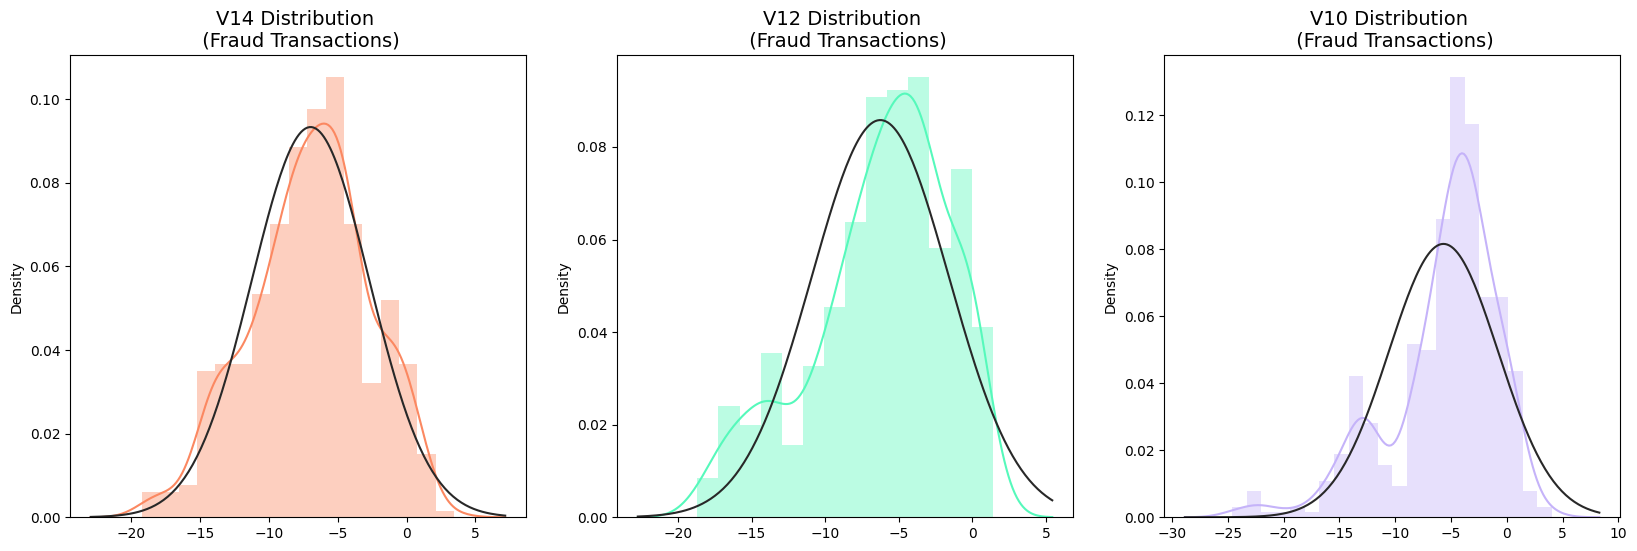

In [17]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

**Outlier Detection and Removal**

Remove outliers of those highly negatively correlated to the class

In [18]:
V14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
V14_q25, V14_q75 = np.percentile(V14_fraud, 25), np.percentile(V14_fraud, 75)
V14_iqr = V14_q75- V14_q25
print('V14 Quartile 25: ', V14_q25, 'Quartile 75: ', V14_q75)
print('V14 IQR: ', V14_iqr)

V14_cutoff = V14_iqr * 1.5 
V14_lower, V14_upper = V14_q25 - V14_cutoff, V14_q75 + V14_cutoff
print('V14 Cut off: ', V14_cutoff)
print('V14 Lower: ', V14_lower)
print('V14 Upper: ', V14_upper)

V14_outlier = [i for i in V14_fraud if i < V14_lower or i > V14_upper]
print('number of outliers: ', len(V14_outlier))

new_df = new_df.drop(new_df[(new_df['V14'] < V14_lower) | (new_df['V14'] > V14_upper)].index)


V14 Quartile 25:  -9.692722964972386 Quartile 75:  -4.282820849486865
V14 IQR:  5.409902115485521
V14 Cut off:  8.114853173228282
V14 Lower:  -17.807576138200666
V14 Upper:  3.8320323237414167
number of outliers:  4


Repeat it for V12 and V10

In [19]:
V12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
V12_q25, V12_q75 = np.percentile(V12_fraud, 25), np.percentile(V12_fraud, 75)
V12_iqr = V12_q75- V12_q25
print('V12 Quartile 25: ', V12_q25, 'Quartile 75: ', V12_q75)
print('V12 IQR: ', V12_iqr)

V12_cutoff = V12_iqr*1.5 
V12_lower, V12_upper = V12_q25 - V12_cutoff, V12_q75 + V12_cutoff
print('V12 Cut off: ', V12_cutoff)
print('V12 Lower: ', V12_lower)
print('V12 Upper: ', V12_upper)

outlier = [i for i in V12_fraud if i < V12_lower or i > V12_upper]
print('number of outliers: ', len(outlier))

new_df = new_df.drop(new_df[(new_df['V12'] < V12_lower) | (new_df['V12'] > V12_upper)].index)

V12 Quartile 25:  -8.67303320439115 Quartile 75:  -2.893030568676315
V12 IQR:  5.780002635714835
V12 Cut off:  8.670003953572252
V12 Lower:  -17.3430371579634
V12 Upper:  5.776973384895937
number of outliers:  4


In [20]:
V10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
V10_q25, V10_q75 = np.percentile(V10_fraud, 25), np.percentile(V10_fraud, 75)
V10_iqr = V10_q75- V10_q25
print('V10 Quartile 25: ', V10_q25, 'Quartile 75: ', V10_q75)
print('V10 IQR: ', V10_iqr)

V10_cutoff = V10_iqr*1.5 
V10_lower, V10_upper = V10_q25 - V10_cutoff, V10_q75 + V10_cutoff
print('V10 Cut off: ', V10_cutoff)
print('V10 Lower: ', V10_lower)
print('V10 Upper: ', V10_upper)

V10_outlier = [i for i in V10_fraud if i < V10_lower or i > V10_upper]
print('number of outliers: ', len(V10_outlier))

#new_df = new_df.drop(new_df[(new_df['V12'] < V12_lower) | (new_df['V12'] > V12_upper)].index)

V10 Quartile 25:  -7.466658535821847 Quartile 75:  -2.5118611381562523
V10 IQR:  4.954797397665595
V10 Cut off:  7.432196096498393
V10 Lower:  -14.89885463232024
V10 Upper:  4.92033495834214
number of outliers:  27


Now we can create boxplots for each Value to check if we removed extreme outliers.

We did remove major outliers, there are fewer outliers at the edge of the plot.

Text(0.5, 1.0, 'V10 Feature \n Reduction of outliers')

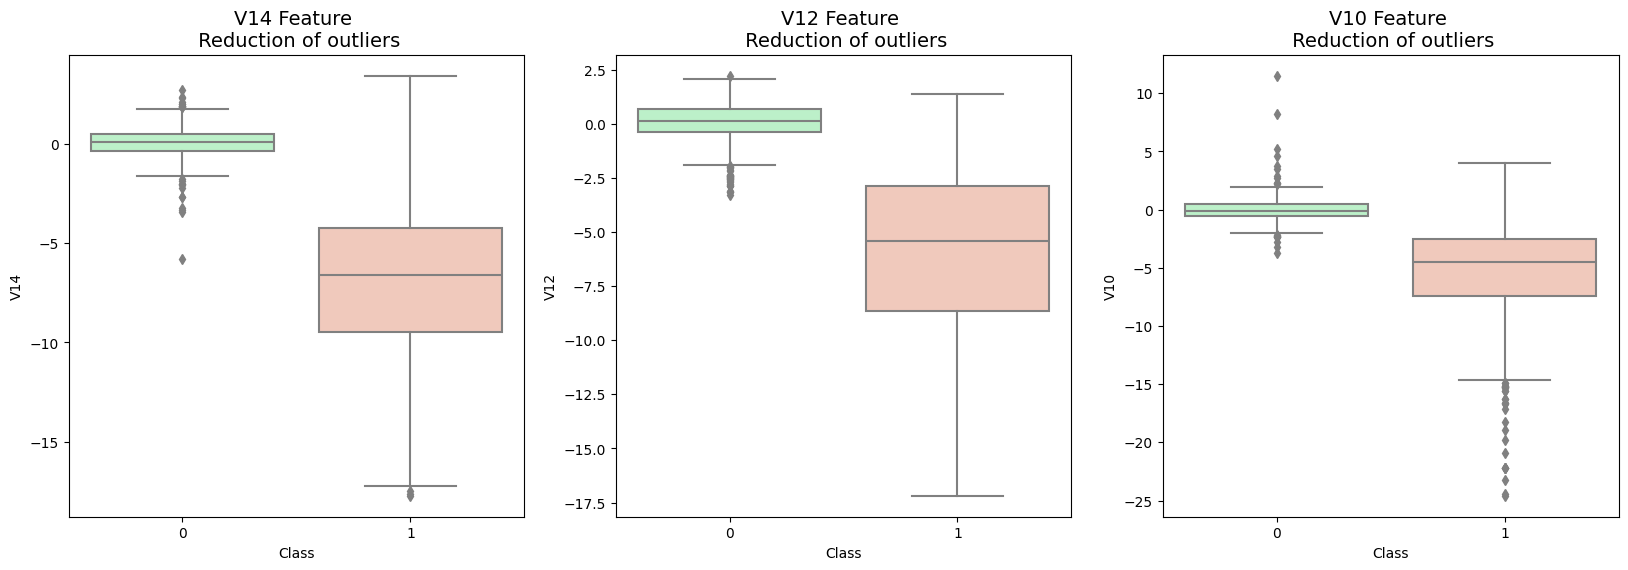

In [21]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)


# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)


# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)


**Run Logistic Regression**

randomly split data into trainning set and testing set

In [54]:
X = new_df.iloc[:, :-1].values
y = new_df.iloc[:, -1].values
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

I choose  to run a logistic regression because the dependent variable 'Class' is categorical (0 or 1). 

Train it using train data set for X and y.

In [55]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

**Cross-Validation**

Evaluate the model's performamce using cross-validation on training data X and y using 5-fold strategy

Calculate the accuracy for each fold and get the mean accuracy for the model

In [56]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5)

# Calculate mean accuracy
mean_accuracy = np.mean(cv_scores)
print(f"Mean Cross-Validation Accuracy: {mean_accuracy * 100:.2f}%")


Mean Cross-Validation Accuracy: 95.00%


Now using trained regressor to predict y 'Class' fraud case based on the test set made from X. 

In [57]:
y_pred = regressor.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(regressor.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


**Confusion Matrix**

Evaluate the effectiveness of the model performace in terms of TP, TN, FP, FN. 

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[102   2]
 [ 13  79]]


**Classification Report**

Check the accuracy, precision, recall, and F1-score for the model.

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       104
           1       0.98      0.86      0.91        92

    accuracy                           0.92       196
   macro avg       0.93      0.92      0.92       196
weighted avg       0.93      0.92      0.92       196



**Insights from report**

Precision: weighted avg 93% accuracy of positive predictions made by the model.

Recall: weighted avg 92% of all positive instances (actual positives) being captured in the model.

F1-Score: the harmonic mean of precision and recall. avg of 92% means we have a good trade-off between minimize false positives and false negatives.

**ROC curve**

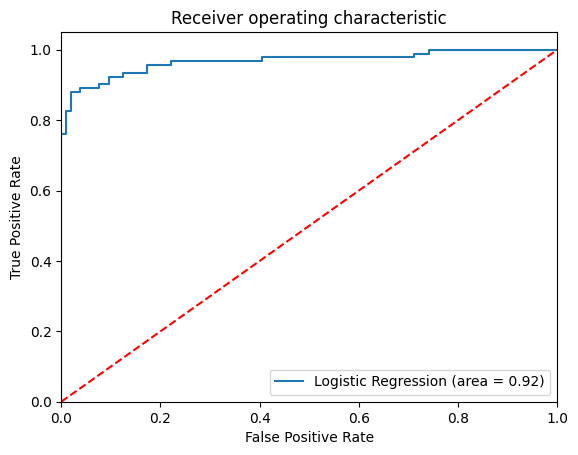

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, regressor.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, regressor.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Insights from ROC curve**

The dotted line represents the ROC curve of a purely random classifier. 

A good classifier stays as far away from that line as possible (toward the top-left corner). As we can see above, the regression line stays very far away from the dotted line, which means this model is a good classifer to detect fraud cases.